# Germany: Comparing data from Johns Hopkins University and Robert Koch Institute 

In [1]:
%config InlineBackend.figure_formats = ['svg']
import datetime
import numpy as np
import pandas as pd
import oscovida as ov
import matplotlib.pyplot as plt
# clear the local cache, i.e. force re-download of data sets
# ov.clear_cache()
ov.display_binder_link("2022-germany-rki-overview.ipynb")

print(f"Last executed: {datetime.datetime.today()}")


[Execute this notebook with Binder](https://mybinder.org/v2/gh/oscovida/binder/master?filepath=ipynb/2022-germany-rki-overview.ipynb)

Last executed: 2022-03-27 16:43:59.655125


### Get data from Johns Hopkins University (JHU)

In [2]:
cases_jhu, deaths_jhu = ov.get_country_data("Germany")

### Get data from Robert-Koch Institute (RKI)


In [3]:
germany = ov.fetch_data_germany()

# As we want the total numbers for Germany, wwe need to accumulate over all # districts (Landkreise) and various rows for each date:
# We use 'Meldedatum' as this is expected to be closest to the JHU data
# See https://npgeo-corona-npgeo-de.hub.arcgis.com/datasets/e408ccf8878541a7ab6f6077a42fd811_0/about
g2 = germany.set_index(pd.to_datetime(germany['Meldedatum']))
g2.index.name = 'date'
g3 = g2.groupby('date').agg('sum')
cases_rki = g3["AnzahlFall"].groupby('date').agg('sum').cumsum()
deaths_rki = g3["AnzahlTodesfall"].groupby('date').agg('sum').cumsum()

# Overview plot Germany with RKI data

The overview plot for Germany (http://oscovida.github.io/html/Germany.html) is based on JHU data (and for completeness attached below). Here we provide the same observables but based on the accumulated RKI data.

We expect the RKI data to severly underestimate the number of deaths in the most recent week(s) - see discussion [here](https://oscovida.github.io/2020-germany-reporting-delay-meldeverzug.html).

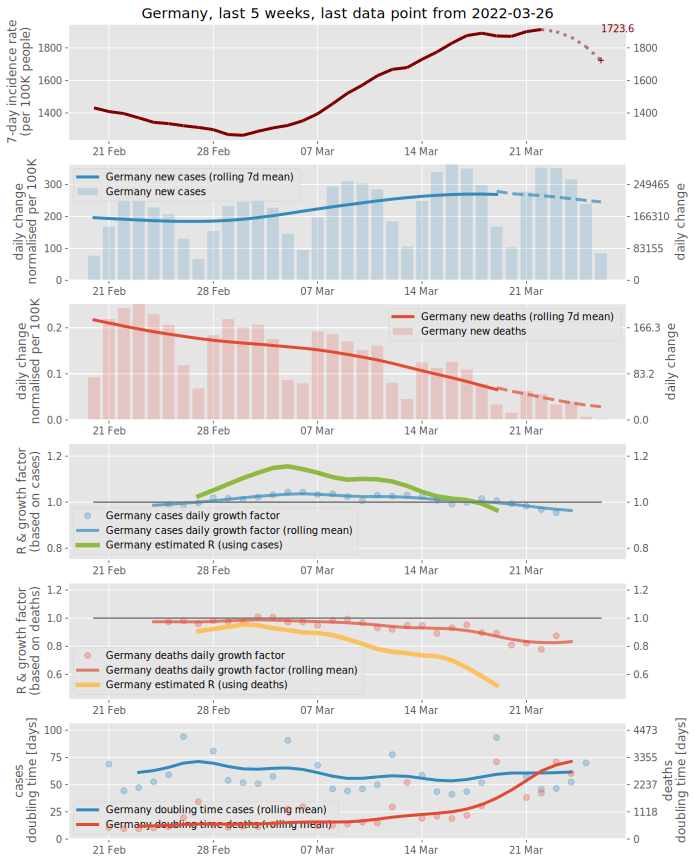

In [4]:
ov.overview(country="Germany", data=(cases_rki, deaths_rki), weeks=5);

## Overview plot Germany with JHU data (last 5 weeks)

This is the 'normal' plot that is shown on the OSCOVIDA pages, i.e. at http://oscovida.github.io/html/Germany.html :

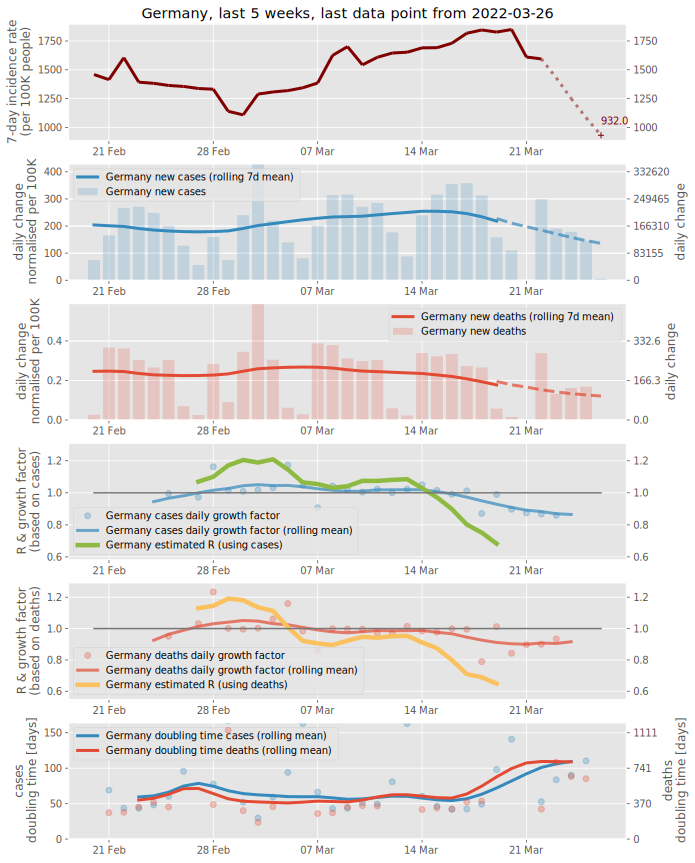

In [5]:
ov.overview(country="Germany", weeks=5);

## Comparison of data from from JHU and RKI: cases (last 5 weeks)

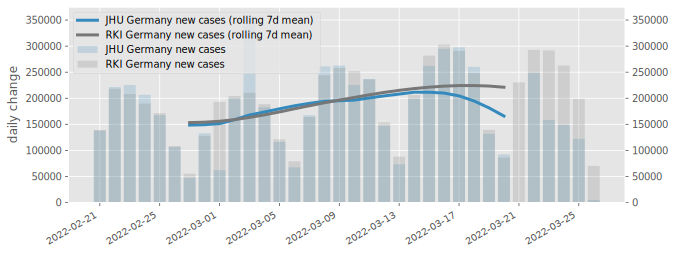

In [6]:
fig, ax = plt.subplots(figsize=(10, 4))
ov.plot_daily_change(ax, cases_jhu[-7*5:], color="C1", labels=["JHU Germany", "cases"])
ov.plot_daily_change(ax, cases_rki[-7*5:], color="C3", labels=["RKI Germany", "cases"])
fig.autofmt_xdate()

This deviation is unusual (March 2022): in the past, the RKI showed greater lag in reporting than the JHU data.

## Comparison of data from from JHU and RKI: deaths (complete pandemic)

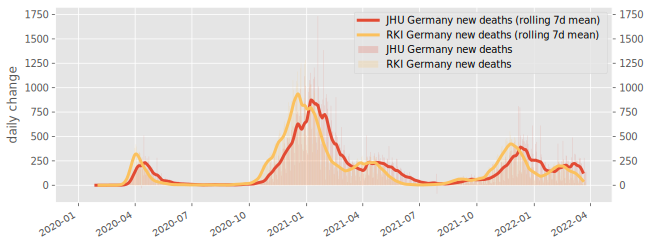

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 4))
ov.plot_daily_change(ax, deaths_jhu, color="C0", labels=["JHU Germany", "deaths"])
ov.plot_daily_change(ax, deaths_rki, color="C4", labels=["RKI Germany", "deaths"])
fig.autofmt_xdate()

The time delay in the reported deaths is well understood: JHU data use the date at which the death was reported, whereas RKI data uses the best available estimate of when the person was infected (so the day of deaths is not visible in that data). See detailed discussion at https://oscovida.github.io/2020-germany-reporting-delay-meldeverzug.html

# Overview plot Germany with RKI data (complete pandemic)

The overview plot for Germany (http://oscovida.github.io/html/Germany.html) is based on JHU data (and for completeness attached below). Here we provide the same observables but based on the accumulated RKI data.

We expect the RKI data to severly underestimate the number of deaths in the most recent week(s) - see discussion above.

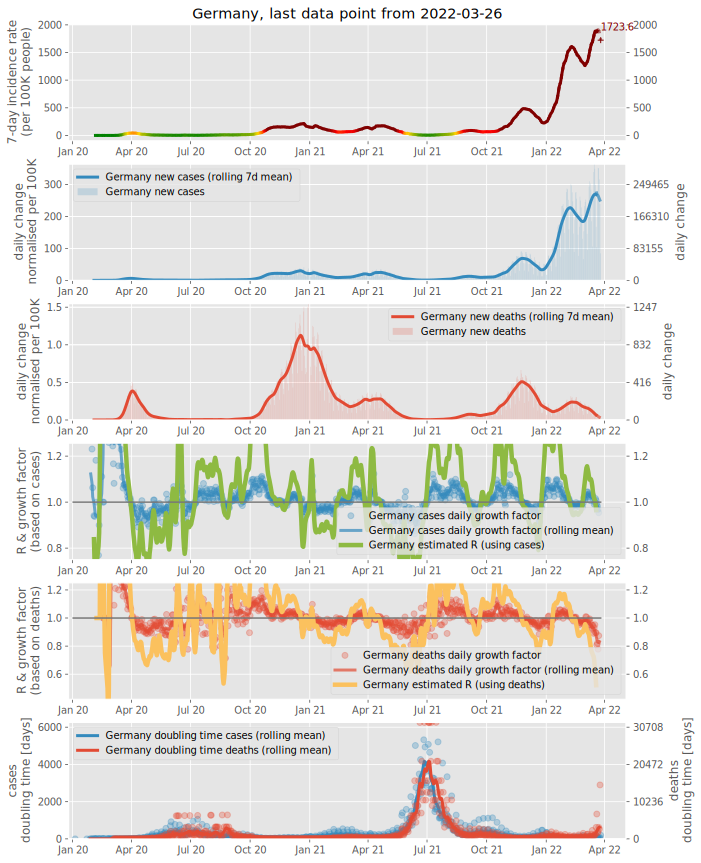

In [8]:
ov.overview(country="Germany", data=(cases_rki, deaths_rki));

## Overview plot Germany with JHU data (complete pandemic)

This is the 'normal' plot that is shown on the OSCOVIDA pages, i.e. at http://oscovida.github.io/html/Germany.html :
        

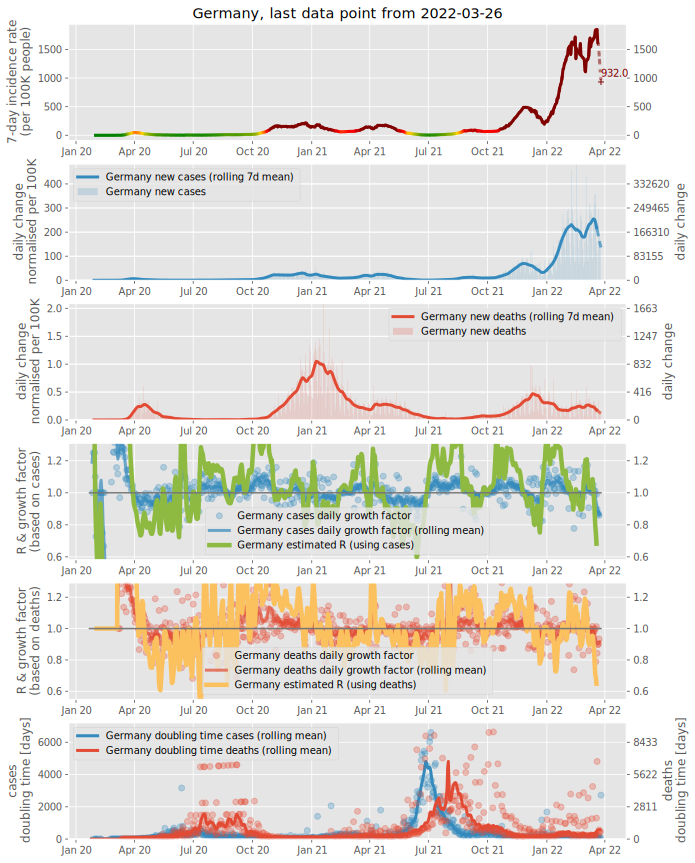

In [9]:
ov.overview(country="Germany");

In [10]:
ov.display_binder_link("2022-germany-rki-overview.ipynb")

[Execute this notebook with Binder](https://mybinder.org/v2/gh/oscovida/binder/master?filepath=ipynb/2022-germany-rki-overview.ipynb)